In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Policy Milestones - State.csv')
df

,statefips,statename,date,policy_description,schools_first_closed,nonessential_biz_first_closed,stayathome_first_start
0,1,Alabama,2020-03-19,Alabama public schools closed,1,0,0
1,1,Alabama,2020-03-28,Alabama ordered closed all non-essential busin...,0,1,0
2,1,Alabama,2020-04-03,Alabama issued stay at home order,0,0,1
3,1,Alabama,2020-04-30,Alabama ended stay at home order statewide,0,0,0
4,1,Alabama,2020-05-01,Alabama reopened select businesses statewide,0,0,0
...,...,...,...,...,...,...,...
667,56,Wyoming,2020-07-01,"Wyoming permitted in-person child care, K-12, ...",0,0,0
668,56,Wyoming,2021-02-25,Wyoming loosened restrictions on gatherings an...,0,0,0
669,56,Wyoming,2021-03-15,Wyoming eliminated restrictions on restaurants...,0,0,0
670,56,Wyoming,2021-06-19,Wyoming ended emergency employment benefits: T...,0,0,0


In [4]:
state_party = {
    'Maryland'  : 'blue',
'Washington' : 'blue',              
'West Virginia' : 'red',           
'Massachusetts' : 'blue',           
'Michigan' : 'blue',                
'Vermont' : 'blue',                 
'Arizona' : 'blue',                
'Florida' : 'red',                 
'Virginia' : 'blue',                
'North Carolina' : 'red',          
'Rhode Island' : 'blue',            
'District of Columbia' : 'blue',    
'Kansas'    : 'red',               
'Pennsylvania' : 'blue',            
'Alaska' : 'red',                  
'Louisiana' : 'red',               
'New Mexico' : 'blue',              
'California' : 'blue',              
'Arkansas' : 'red',                
'New York' : 'blue',                
'Iowa' : 'red',                    
'Maine' : 'blue',                   
'Idaho' : 'red',                   
'Hawaii' : 'blue',                  
'Georgia' : 'blue',                 
'Minnesota' : 'blue',               
'Delaware' : 'blue',                
'Tennessee' : 'red',               
'Colorado' : 'blue',                
'Ohio' : 'red',                    
'Texas' : 'red',                   
'Missouri' : 'red',                
'Wyoming' : 'red',                 
'New Hampshire' : 'blue',           
'Nevada' : 'blue',                  
'Nebraska' : 'red',                
'Illinois' : 'blue',                
'Montana' : 'red',                 
'Kentucky' : 'red',                
'Oklahoma' : 'red',                
'Oregon' : 'blue',                  
'North Dakota' : 'red',            
'Wisconsin' : 'blue',               
'Indiana' : 'red',                 
'New Jersey' : 'blue',              
'Alabama' : 'red',                 
'Utah' : 'red',                     
'Connecticut' : 'blue',              
'South Carolina' : 'red',           
'Mississippi' : 'red',              
'South Dakota' : 'red'  }           
df['party'] = df['statename'].map(state_party)

In [5]:
df

,statefips,statename,date,policy_description,schools_first_closed,nonessential_biz_first_closed,stayathome_first_start,party
0,1,Alabama,2020-03-19,Alabama public schools closed,1,0,0,red
1,1,Alabama,2020-03-28,Alabama ordered closed all non-essential busin...,0,1,0,red
2,1,Alabama,2020-04-03,Alabama issued stay at home order,0,0,1,red
3,1,Alabama,2020-04-30,Alabama ended stay at home order statewide,0,0,0,red
4,1,Alabama,2020-05-01,Alabama reopened select businesses statewide,0,0,0,red
...,...,...,...,...,...,...,...,...
667,56,Wyoming,2020-07-01,"Wyoming permitted in-person child care, K-12, ...",0,0,0,red
668,56,Wyoming,2021-02-25,Wyoming loosened restrictions on gatherings an...,0,0,0,red
669,56,Wyoming,2021-03-15,Wyoming eliminated restrictions on restaurants...,0,0,0,red
670,56,Wyoming,2021-06-19,Wyoming ended emergency employment benefits: T...,0,0,0,red


In [6]:
df = df[df['statename'] != 'District of Columbia']


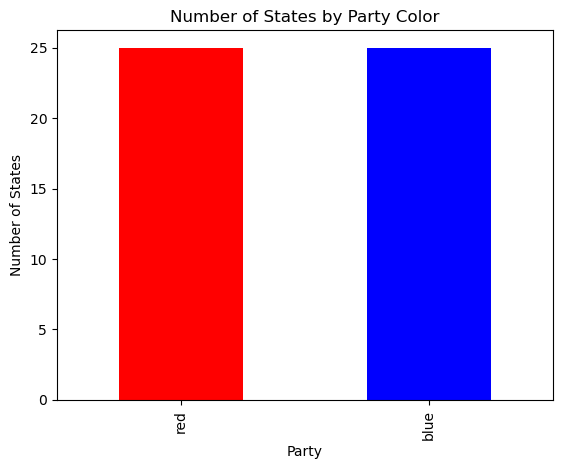

25    2
Name: party, dtype: int64

In [7]:
blue_red = df[['statename', 'party']].drop_duplicates()['party'].value_counts()
blue_red.plot(kind='bar', color=['red', 'blue'])
plt.title("Number of States by Party Color")
plt.xlabel("Party")
plt.ylabel("Number of States")
plt.show()

blue_red.value_counts()

In [8]:
employment = 'emergency employment'
states_with_policy = df.loc[df['policy_description'].str.contains(employment, case=False)].drop_duplicates()
s=states_with_policy['statename']


ended_employment_benefits  No  Yes
party                             
blue                       22    3
red                         4   21


<AxesSubplot:xlabel='party'>

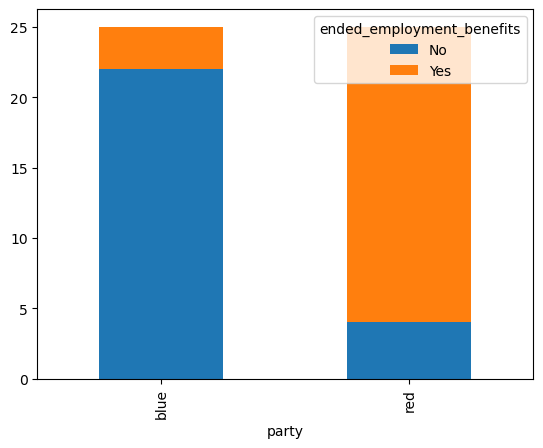

In [9]:
all_states = df[['statename']].drop_duplicates()
all_states['ended_employment_benefits']= all_states['statename'].isin(states_with_policy['statename'])
all_states['party'] = all_states['statename'].map(state_party)

#converting false/true to yes/no
all_states['ended_employment_benefits'] = all_states['ended_employment_benefits'].map({True: "Yes", False: "No"})

summary = all_states.groupby(['party','ended_employment_benefits']).size().unstack(fill_value=0)

print(summary)
summary.plot(kind = 'bar',stacked = True)

No     26
Yes    24
Name: ended_employment_benefits, dtype: int64


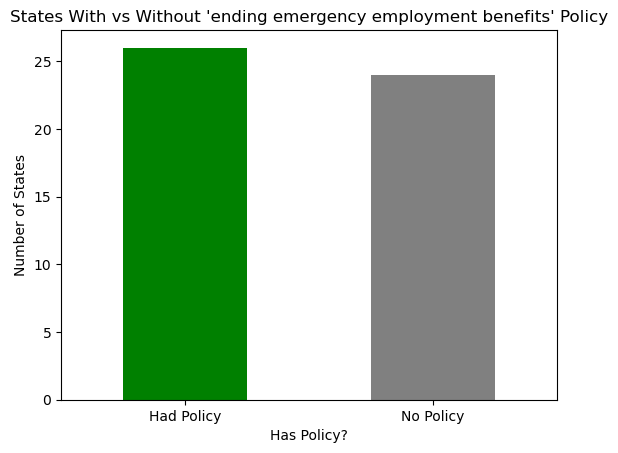

In [10]:
policy_counts = all_states['ended_employment_benefits'].value_counts()
print(policy_counts)
policy_counts.plot(kind='bar', color=['green','gray'])
plt.title("States With vs Without 'ending emergency employment benefits' Policy")
plt.xlabel("Has Policy?")
plt.ylabel("Number of States")
plt.xticks([0,1], ["Had Policy","No Policy"], rotation=0)
plt.show()

In [11]:
#d = states_with_policy['date']
#d
# Convert to datetime if not already
states_with_policy['date'] = pd.to_datetime(states_with_policy['date'])

# Sort chronologically
d = states_with_policy['date'].sort_values()

print(d)


340   2021-06-12
23    2021-06-12
351   2021-06-12
204   2021-06-12
463   2021-06-19
375   2021-06-19
649   2021-06-19
8     2021-06-19
170   2021-06-19
192   2021-06-19
670   2021-06-19
142   2021-06-26
132   2021-06-26
53    2021-06-26
476   2021-06-26
487   2021-06-26
539   2021-06-26
564   2021-06-26
572   2021-06-26
363   2021-06-27
280   2021-07-03
550   2021-07-03
37    2021-07-10
244   2021-07-31
Name: date, dtype: datetime64[ns]


party                      blue  red
ended_employment_benefits           
No                           22    4
Yes                           3   21


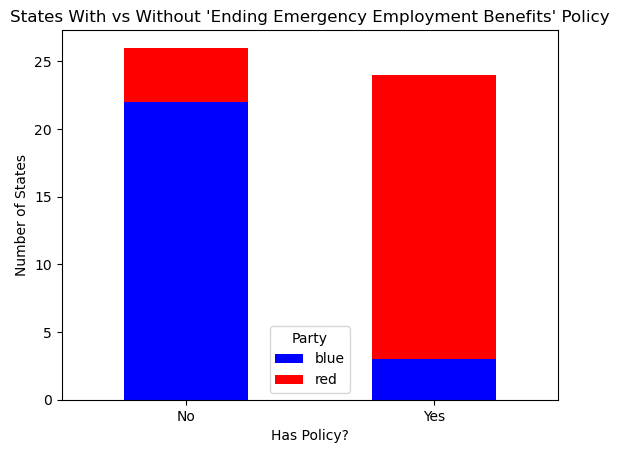

In [12]:
import matplotlib.pyplot as plt

# Group by Yes/No + Party
summary = all_states.groupby(['ended_employment_benefits','party']).size().unstack(fill_value=0)

print(summary)

# Plot stacked bar (each bar = Yes/No, split by party)
summary.plot(kind='bar', stacked=True, color=['blue','red'])
plt.title("States With vs Without 'Ending Emergency Employment Benefits' Policy")
plt.xlabel("Has Policy?")
plt.ylabel("Number of States")
plt.xticks(rotation=0)
plt.legend(title="Party")
plt.show()


In [23]:
all_states

,statefips,ended_employment_benefits,party
0,1,Yes,NaN
10,2,Yes,NaN
24,4,Yes,NaN
40,5,Yes,NaN
54,6,No,NaN
68,8,No,NaN
81,9,No,NaN
89,10,No,NaN
117,12,Yes,NaN
133,13,Yes,NaN


In [25]:
yes_fips = all_states.loc[all_states['ended_employment_benefits'] == 'Yes', 'statefips']
yes_fips

0       1
10      2
24      4
40      5
117    12
133    13
159    16
184    18
194    19
232    22
259    24
336    28
342    29
354    30
365    31
453    38
464    39
477    40
536    46
540    47
553    48
565    49
629    54
660    56
Name: statefips, dtype: int64